<a href="https://colab.research.google.com/github/angelarwa/TIL/blob/master/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Word2Vec**
- 분산 표현(distributed representation)
- 비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다'라는 가정
- https://wikidocs.net/22660
- https://shuuki4.wordpress.com/2016/01/27/word2vec-%EA%B4%80%EB%A0%A8-%EC%9D%B4%EB%A1%A0-%EC%A0%95%EB%A6%AC/
https://datascienceschool.net/view-notebook/6927b0906f884a67b0da9310d3a581ee/

In [0]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import codecs
from konlpy.tag import Twitter
from gensim.models import word2vec
from konlpy.utils import pprint
from sklearn.manifold import TSNE
from konlpy.tag import Okt
import numpy as np

In [0]:
# 입력된 텍스트는 단어로 구성된 문장으로 설정
sentences = [['this', 'is', 'a',   'good',      'product'],
              ['it',   'is', 'a',   'excellent', 'product'],
              ['it',   'is', 'a',   'bad',       'product'],
              ['that', 'is', 'the', 'worst',     'product']]

# 문장을 이용하여 단어와 벡터를 생성한다.
model = Word2Vec(sentences, size=20, window=3, min_count=1)
    # sentences 문장을, 20차원의 벡터로, 중심단어를 기준으로 3개의 단어까지 계산, 최소한 1번 이상 반복되는 것을 고려한다는 옵션

# 단어벡터를 구한다.
word_vectors = model.wv
print(word_vectors["this"]) # 각 단어의 벡터 값 확인
print(word_vectors["bad"])

[-0.00432232 -0.02334999  0.01646721 -0.01996201  0.00464832  0.01631781
  0.01858823  0.0022909  -0.01241233 -0.01907774 -0.00057105 -0.02276696
 -0.00605038  0.01079123  0.00751253  0.017374   -0.0056534  -0.0215122
 -0.01992734  0.0056727 ]
[ 0.00504112 -0.0178447   0.02109611 -0.01355652 -0.0083339   0.00222554
  0.00198128 -0.02290168  0.02205011  0.02351567  0.00140235 -0.00235775
 -0.01673927 -0.00412627  0.01097586 -0.00597862 -0.00886786  0.00600027
 -0.00625469 -0.01380415]


In [0]:
vocabs = word_vectors.vocab.keys() # 어떤 단어들이 있는지 알아보는 함수
print(vocabs) # 여기에 속한 단어들만 이용해서 유사도 분석을 진행

dict_keys(['this', 'is', 'a', 'good', 'product', 'it', 'excellent', 'bad', 'that', 'the', 'worst'])


In [0]:
model2 = Word2Vec(sentences, size=20, window=3, min_count=2) # 최소 빈도수 2로 변경
word_vectors2 = model2.wv
vocabs2 = word_vectors2.vocab.keys()
print(vocabs2)

dict_keys(['is', 'a', 'product', 'it'])


In [0]:
word_vectors_list = [word_vectors[v] for v in vocabs] # 전체 워드에 대한 벡터 값 확인
print(word_vectors_list)

[array([-0.00432232, -0.02334999,  0.01646721, -0.01996201,  0.00464832,
        0.01631781,  0.01858823,  0.0022909 , -0.01241233, -0.01907774,
       -0.00057105, -0.02276696, -0.00605038,  0.01079123,  0.00751253,
        0.017374  , -0.0056534 , -0.0215122 , -0.01992734,  0.0056727 ],
      dtype=float32), array([ 0.01908322, -0.02109438,  0.00490107, -0.02321275,  0.00109759,
       -0.01542465,  0.01081145, -0.01275122, -0.00206967,  0.00544798,
       -0.0068582 , -0.01447906,  0.01083719,  0.01872656,  0.00183681,
        0.00959957,  0.00156497,  0.00518368, -0.01479772,  0.00219117],
      dtype=float32), array([-0.00697236, -0.01060551,  0.01248677,  0.02275631, -0.00405361,
       -0.00362888,  0.02298624, -0.00707412, -0.02477165,  0.01778486,
        0.00467873,  0.01069036, -0.01412332, -0.01702854,  0.01214344,
       -0.00442028,  0.01648281, -0.00279738,  0.02155608,  0.01558128],
      dtype=float32), array([ 0.01613928, -0.00498977,  0.00366916, -0.00284186, -0.0086

In [0]:
# 두 단어의 유사도 검색
print(model.similarity(w1='it', w2='this')) # 두 단어 벡터 값의 코사인 값이 결과로 됨
print(model.similarity(w1='it', w2='it'))
    # cos은 같으면 1, 다르면 0의 결과 값이 나옴
    # 좌표 상에서 거리(distance 값)는 0에 가까울수록 두 점이 가까운 것이지만,
    # cos 값으로는 1에 가까울 수록 두 단어의 유사도가 높은 것
        # 단, 두 단어의 cos 값은 같더라도 유클리디안 거리 값에는 다른 경우가 존재함... 따라서 특정 경우마다 다를 수 있음
print(model.similarity(w1='it', w2='the'))
print(model.similarity(w1='the', w2='it'))

-0.21219425
1.0
0.4421249
0.4421249


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to depreca

In [0]:
# 입력한 단어와 가장 유사한(가장 가까운 곳에 있는) 단어 검색
model.most_similar('it', topn=2) # 가장 유사한 단어 개수 옵션

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('the', 0.4421249032020569), ('bad', 0.4418987035751343)]

### 네이버 후기 평가

In [0]:
# id/document/label(긍정부정)

def read_data(filename): #파일 읽기 함수. 첫줄 헤더를 제외하고 한 줄씩 읽어서 data 에 담아서 리턴 한다.
  with open(filename, encoding='utf-8', mode='r') as f:
    data=[line.split('\t') for line in f.read().splitlines()]
    data=data[1:] # header 제외
  return data
ratings_train=read_data('/content/gdrive/My Drive/AI/TIL/data/ratings_train.txt')
print(ratings_train[0])

# print(len(data)) #데이터 150000개

['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0']


In [0]:
okt=Okt()
def tokens(doc): #해당 문장을 형태소 분석-> 분석된 형태소 하나하나에 대해서 리스트로 리턴->슬래시로 묶어서 출력
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)] 

tokens('아 더빙.. 진짜 짜증나네요 목소리')

['아/Exclamation',
 '더빙/Noun',
 '../Punctuation',
 '진짜/Noun',
 '짜증나다/Adjective',
 '목소리/Noun']

In [0]:
# 파일 중에서 영화 리뷰 데이터만 담기
docs=[]
for row in ratings_train:
  docs.append(row[1]) #row[1]=document(영화 리뷰)만 가져옴
print(docs[:10]) #상위 10개만 출력

['아 더빙.. 진짜 짜증나네요 목소리', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '너무재밓었다그래서보는것을추천한다', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다', '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.', '원작의 긴장감을 제대로 살려내지못했다.', '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네', '액션이 없는데도 재미 있는 몇안되는 영화', '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?']


In [0]:
data=[tokens(d) for d in docs] 

In [0]:
w2v_model=word2vec.Word2Vec(data, size=100, window=4, min_count=2) #파라미터 조정가능; 줄이고 싶은 차원은 100차원(150000개의 데이터를 100으로 줄임), 빈도수 최소 2이상(1제외) 
w2v_model.save('naver.model') # window= 중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지를 결정한 범위

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
vocabs=w2v_model.wv.vocab.keys() #단어 체크
print(vocabs)
print(len(vocabs))

dict_keys(['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나다/Adjective', '목소리/Noun', '흠/Noun', '.../Punctuation', '포스터/Noun', '보고/Noun', '초딩/Noun', '영화/Noun', '줄/Noun', '..../Punctuation', '오버/Noun', '연기/Noun', '조차/Josa', '가볍다/Adjective', '않다/Verb', '너/Modifier', '무재/Noun', '다그/Noun', '래서/Noun', '보다/Verb', '추천/Noun', '한/Josa', '다/Adverb', '교도소/Noun', '이야기/Noun', '구먼/Noun', '솔직하다/Adjective', '재미/Noun', '는/Josa', '없다/Adjective', '평점/Noun', '조정/Noun', '사이/Modifier', '몬페/Noun', '그/Determiner', '의/Noun', '익살스럽다/Adjective', '가/Josa', '돋보이다/Verb', '!/Punctuation', '스파이더맨/Noun', '에서/Josa', '늙다/Verb', '보이다/Verb', '하다/Verb', '커스틴/Noun', '던스트/Noun', '너무나도/Adverb', '이쁘다/Adjective', '막/Noun', '걸음/Noun', '마/Noun', '떼다/Verb', '3/Number', '세/Noun', '부터/Josa', '초등학교/Noun', '1/Number', '학년/Noun', '생인/Noun', '8/Number', '살다/Verb', './Punctuation', 'ㅋㅋㅋ/KoreanParticle', '별/Modifier', '반개/Noun', '도/Josa', '아깝다/Adjective', '움/Noun', '원작/Noun', '의/Josa', '긴장감/Noun', '을/Josa', '제대로/Noun', '살리다/Ve

In [0]:
print(w2v_model.wv.most_similar(positive=tokens(u'남자 여배우'), negative=tokens(u'배우'), topn=1)) #남자+여배우-배우=여자; 유사도가 가장 높은 값을 출력해줌 
#단어를 기반으로 하는 경우에는 어휘사전에 있는 단어만 가능함! #u=unicode

[('여자/Noun', 0.8300573825836182)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(w2v_model.wv.most_similar(tokens('공효진'))) #'공효진' 근처에 있는 단어들 #(word, similarity)

[('이동욱/Noun', 0.9063811898231506), ('신민아/Noun', 0.8985468149185181), ('박유천/Noun', 0.897750735282898), ('남궁민/Noun', 0.891237735748291), ('존잘/Noun', 0.8864096999168396), ('조승우/Noun', 0.8846747875213623), ('고현정/Noun', 0.8826470375061035), ('현빈/Noun', 0.8819786310195923), ('김주혁/Noun', 0.8803148865699768), ('전광렬/Noun', 0.8797811269760132)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
vocab = list(w2v_model.wv.vocab) #단어를 list로 가져옴
# print(vocab)
print('***')
X = w2v_model[vocab] #model함수에 단어를 넣으면 featrue vector가 나옴
print(X)
print(X.shape) 
print('***')
tsne = TSNE(n_components=2) #고차원 데이터를 저차원 데이터로 시각화하여 나타내는 함수; 2개의 차원으로 줄이겠다.
X_tsne = tsne.fit_transform(X[:300,:]) #300개의 데이터만 한정
print(X_tsne.shape) #300개, 2차원
# print(X_tsne) #(x축, y축)

***
[[ 0.8566237   0.994026   -0.7562135  ...  0.922912    0.3823037
  -0.8652678 ]
 [ 0.04746801 -0.9834984   0.07632139 ... -0.7064854  -0.27959523
  -0.41070643]
 [-0.2914389   0.32600623 -0.2584169  ... -0.17385288  0.4971643
   0.6984568 ]
 ...
 [ 0.00470633  0.00566153 -0.02260967 ... -0.05305857  0.01743409
  -0.04987662]
 [ 0.02065152 -0.00256294  0.00726353 ... -0.00728355  0.01539338
  -0.00216082]
 [-0.00252392 -0.02981296 -0.03734832 ... -0.03491423  0.01465611
  -0.03003518]]
(27477, 100)
***


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


(300, 2)


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


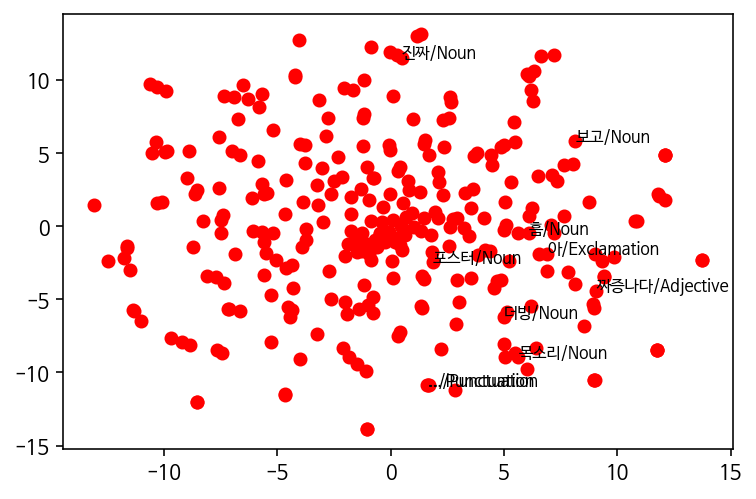

In [0]:
from matplotlib import font_manager, rc
import matplotlib as mpl

# 한글 폰트 setting
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name)

# colab 한글폰트 대응
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
# 여기까지 

mpl.rcParams['axes.unicode_minus'] = False # 마이너스 영역을 정상적으로 나오게 함

plt.scatter(X_tsne[:,0], X_tsne[:,1], c='red')
#             x좌표         y좌표
words = vocab[:10]  #상위 10개 단어만 출력
for i, word in enumerate(words):
    plt.text(X_tsne[i,0], X_tsne[i,1], word, fontsize=8) 
plt.savefig('out.png', dpi=200)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


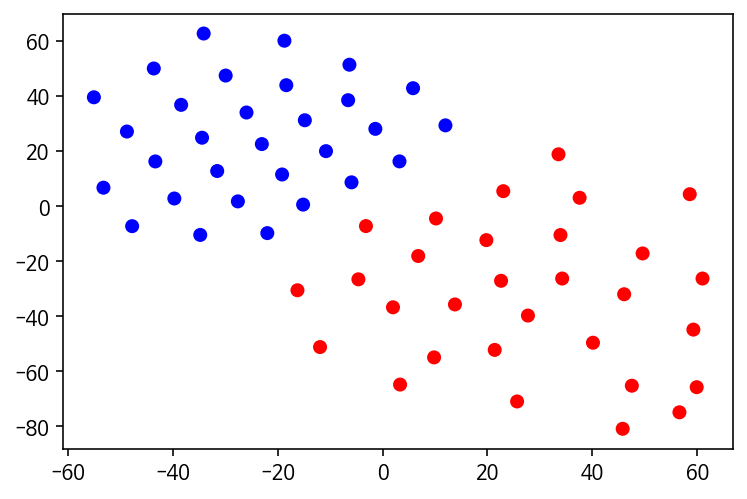

In [0]:
group1 = w2v_model.wv.most_similar(tokens('짜증나다'), topn=30)
group1 = [w for (w,s) in group1] #(word, similarity)에서 word만 가져옴
X1 = w2v_model[group1]

group2 = w2v_model.wv.most_similar(tokens('정우성'), topn=30)
group2 = [w for (w,s) in group2]
X2 = w2v_model[group2]

X_tsne =tsne.fit_transform(np.vstack([X1, X2])) # 이 부분 때문에 실행할때마다 조금씩 다르게 나옴.

label = np.hstack([0*np.ones(30), np.ones(30)])
c = ['red' if l==0  else 'blue'  for l in label] # 짜증나다=red/정우성=blue

plt.scatter(X_tsne[:,0], X_tsne[:,1], color=c)

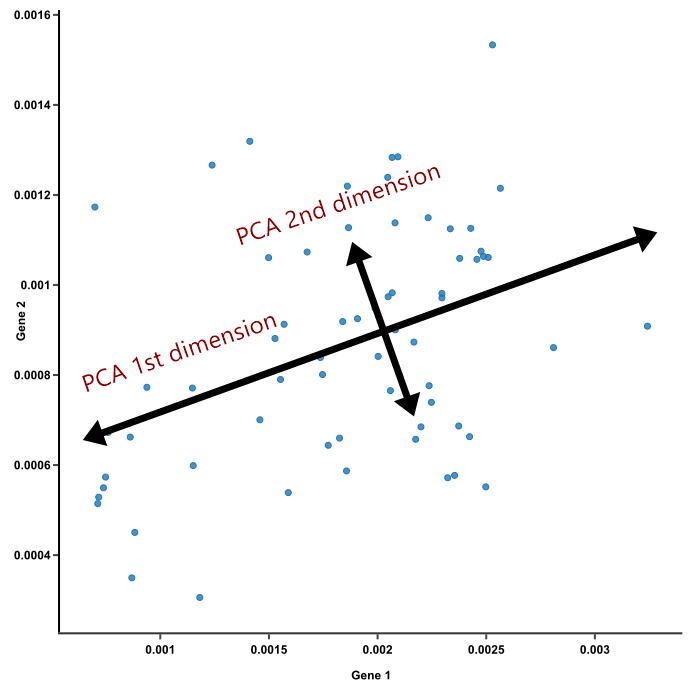

In [0]:
# PCA; 에러가 작은 축을 찾음
from IPython.display import Image
Image('pca.png', width=300)

In [0]:
# Doc2Vec
#https://lovit.github.io/nlp/representation/2018/03/26/word_doc_embedding/


### **RNN(Recurrent Neural Network)**
- https://imjuno.tistory.com/entry/RNN
- 일반 신경망(FFNets): 개별 데이터를 독립적으로 학습
- 순환 신경망: 시계열 데이터 학습에 적합
 - 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력과 은닉층 노드의 다음 계산의 입력으로 보냄
 - RNN에서는 노드를 셀(cell)이라고 하고, 이전의 값을 기억하려고 하는 일종의 메모리 역할 수행
 - 이전 입력값의 처리결과를 다음 출력에 반영하자!
 - 은닉층=relu, sigmoid 같은 비선형 함수 사용
 - 하이퍼볼릭탄젠트(tanh)

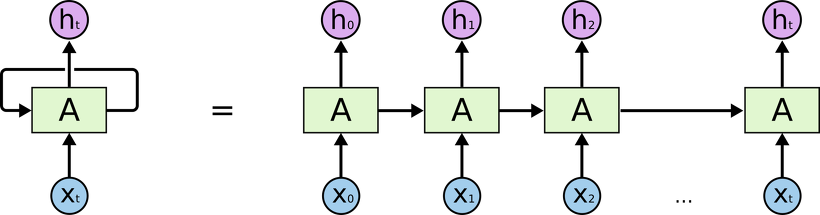

In [0]:
from IPython.display import Image
Image('RNN (2).png', width=500)

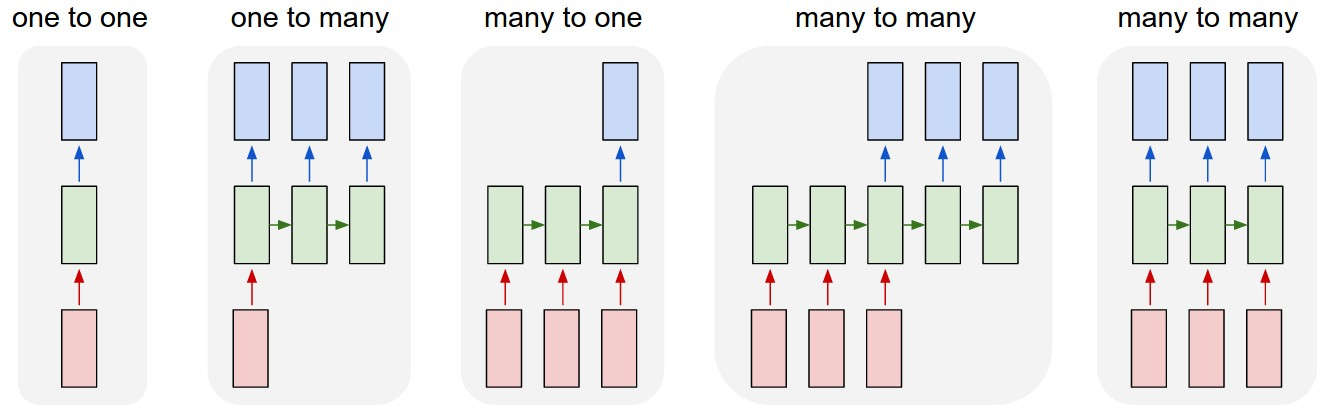

In [0]:
from IPython.display import Image
Image('RNN.jpeg', width=500) 

- one to one: image classification
- one to many: image captioning
- many to one: sentiment classification
- many to many: chatbot
- many to many: video classification
* Long-Short Term Memory (LSTM)